In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
%matplotlib
from cycler import cycler
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import numpy as np

# scikit-optimize
import skopt
from skopt.plots import *

Using matplotlib backend: TkAgg


[ 6  1  9  8 12  4  0  3  2 13  7 31  5 30 32 14 39 40 26 47 18 23 44 33
 17 21 27 11 16 41 36 53 48 55 37 51 10 54 22 28 24 15 34 38 56 43 52 20
 42 29 46 35 50 45 59 58 19 49 25 57]


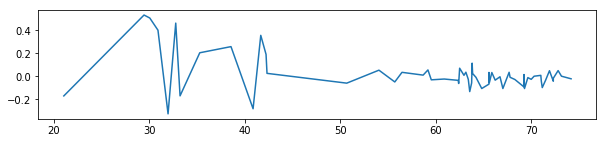

In [60]:
pitfall_file = '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-HIPS-USER1.out'

pitfalls = np.genfromtxt(pitfall_file, dtype='str')

idx = np.arange(0, len(pitfalls), 4)
micro = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(1, len(pitfalls), 4)
avg = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(2, len(pitfalls), 4)
prre = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(3, len(pitfalls), 4)
tpfp = [float(p.strip('%')) for p in pitfalls[idx]]

sort_idx = np.argsort(micro)
print(sort_idx)

micro = np.array([micro[i] for i in sort_idx])
avg = np.array([avg[i] for i in sort_idx])
prre = np.array([prre[i] for i in sort_idx])
tpfp = np.array([tpfp[i] for i in sort_idx])

micro_bias = (micro - avg) / avg * 100
prre_bias = (prre - avg) / avg * 100
tpfp_bias = (tpfp - avg) / avg * 100

fig = plt.figure(figsize=(10, 2))
plt.plot(micro, micro_bias)
# plt.plot(avg)
# plt.plot(prre, prre_bias)
#plt.plot(tpfp, tpfp_bias)
plt.show()

[602 600 615 604 603 608 605   3 622 611 499 601 507 488 534 524 572 610
 183 529 546 185 599 537 570 522 553 421  85 719 573 564 544 559 487 500
 667 566 612 496 492 574 430 104 540 512 513 502  18 557 609 616 543 483
   8 665 562 551 301 703 715 480 481 485 306 424 684 678 494 527 541   4
 368 484 304 613 548 425 623 497 526  16 525 242 560 308 520 618 664 441
 100 530 303 423 549   5 582 277 319 521 571 373 518  76 532 248 320 461
 495 402 226 364 435  38 187 542 241 352 302 365 258 112 437 311 482 538
 558 619 310 606 422 360 498 269 630 366 283  89 515 428 292 323 372 300
 491 236 259 309 247 251 257 274 369  60 249  84 317 579 490 252 245 243
 362 291 363 614 240  12  17 266  62 426  63 379 523 287 457 280 429 256
 268 387 293  78 493 438 273 275 663  81 550 281 117 547  71 214 348 576
 109 450 244 261 545 361 607 489 567  93 434 505 254 503 504 260 276 516
 486 632 267 563 305 206 126 554 625  80 227 284 113 586  87 666 313 420
 285  43  92 427  36  69 451 556 561 620 552 307 56

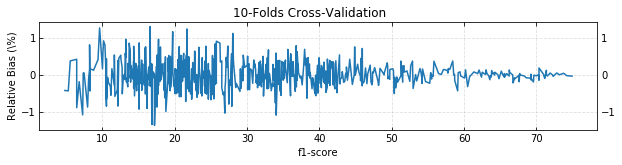

In [71]:
files = [
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-BAG-USER1.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-HAND-USER1.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-HIPS-USER1.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-TORSO-USER1.out',
    
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-BAG-USER2.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-HAND-USER2.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-HIPS-USER2.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-TORSO-USER2.out',
    
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-BAG-USER3.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-HAND-USER3.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-HIPS-USER3.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.4-maxtrainingepochs-per-cv-run-TORSO-USER3.out',
]

pitfalls = np.concatenate(
    [np.genfromtxt(pitfall_file, dtype='str')
     for pitfall_file in files])

idx = np.arange(0, len(pitfalls), 4)
micro = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(1, len(pitfalls), 4)
avg = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(2, len(pitfalls), 4)
prre = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(3, len(pitfalls), 4)
tpfp = [float(p.strip('%')) for p in pitfalls[idx]]

sort_idx = np.argsort(micro)
print(sort_idx)

micro = np.array([micro[i] for i in sort_idx])
avg = np.array([avg[i] for i in sort_idx])
prre = np.array([prre[i] for i in sort_idx])
tpfp = np.array([tpfp[i] for i in sort_idx])

micro_bias = (micro - avg) / avg * 100
prre_bias = (prre - avg) / avg * 100
tpfp_bias = (tpfp - avg) / avg * 100

fig = plt.figure(figsize=(10, 2))
plt.plot(micro, micro_bias)
# plt.plot(avg)
#plt.plot(prre, prre_bias)
# plt.plot(tpfp, tpfp_bias)

# customization
plt.grid()
plt.tick_params(top=True, direction='in')
plt.tick_params(labelright=True, direction='in')
plt.grid(which='major', linestyle='--', alpha=0.4)

fig.get_axes()[0].set_xlabel('f1-score')
fig.get_axes()[0].set_ylabel('Relative Bias (\%)')
fig.suptitle('10-Folds Cross-Validation')
fig.savefig("./pitfalls/relative-bias-5.5.3.4.svg", format="svg")

plt.show()

[609 602 543 529 608 485 496 482 480 486 488 599 546 481 544 545 548 667
 603 508 552 542 549 601 551 631 606 556 604 498 537  62  70 484 433 514
 605 185   2  14 521  66  63 571  65   9   4 553 421 495 182   0 526 423
 540 492 183 184 497 534 663 500  48  61 499  68   1 491 507 673 129 555
 538 483 120 624 306 431  60 525   6   3 513 613 180 266 600 186   8 126
 261 665 688 315  69 490 432  64 505 563 374 244 245 554 304 699 425 308
 355 494 428 504 661 303 493 617 319 426 430 607 263 564 254 420 700 257
 246 312 267 541 512 300 324 424 369 305 313 434 360 364 365 371 242 247
 309 368 422   5 241 189 518 332 363 188 255 362 243 252 256 594 664 264
  59 373 465 519 461 250 251 550 436 361 301 288 427 280 509 181 670 524
 676 121  13 672 265 487 516 240 385 429 341  79 248 307 302 678 689 531
 366 287 392 510 489 262 258 249 515 194 517 125 285 547 253 662 444 611
  67 122 501 523 683 274  77 260 696 579 192 536 259 561  88 502 282 294
 271 719  72 533 443 314 123 367  12 622 558 535 27

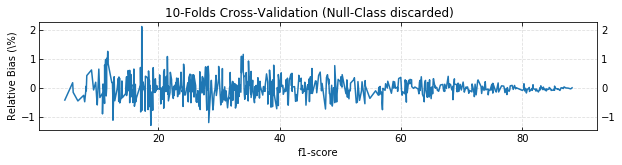

In [72]:
files = [
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-BAG-USER1.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-HAND-USER1.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-HIPS-USER1.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-TORSO-USER1.out',
    
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-BAG-USER2.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-HAND-USER2.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-HIPS-USER2.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-TORSO-USER2.out',
    
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-BAG-USER3.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-HAND-USER3.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-HIPS-USER3.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.2-TORSO-USER3.out',
]

pitfalls = np.concatenate(
    [np.genfromtxt(pitfall_file, dtype='str')
     for pitfall_file in files])

idx = np.arange(0, len(pitfalls), 4)
micro = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(1, len(pitfalls), 4)
avg = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(2, len(pitfalls), 4)
prre = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(3, len(pitfalls), 4)
tpfp = [float(p.strip('%')) for p in pitfalls[idx]]

sort_idx = np.argsort(micro)
print(sort_idx)

micro = np.array([micro[i] for i in sort_idx])
avg = np.array([avg[i] for i in sort_idx])
prre = np.array([prre[i] for i in sort_idx])
tpfp = np.array([tpfp[i] for i in sort_idx])

micro_bias = (micro - avg) / avg * 100
prre_bias = (prre - avg) / avg * 100
tpfp_bias = (tpfp - avg) / avg * 100

fig = plt.figure(figsize=(10, 2))
plt.plot(micro, micro_bias)
# plt.plot(avg)
#plt.plot(prre, prre_bias)
# plt.plot(tpfp, tpfp_bias)

# customization
plt.grid()
plt.tick_params(top=True, direction='in')
plt.tick_params(labelright=True, direction='in')
plt.grid(which='major', linestyle='--', alpha=0.4)

fig.get_axes()[0].set_xlabel('f1-score')
fig.get_axes()[0].set_ylabel('Relative Bias (\%)')
fig.suptitle('10-Folds Cross-Validation (Null-Class discarded)')
fig.savefig("./pitfalls/relative-bias-5.5.3.2.svg", format="svg")
plt.show()

# Meta-Segmented Cross-Validation

[325  75 128 536 537  69 580 587 597 544 594 307 183  66 105 547 309 419
 529  60 297  62 475 305 429 201 357  63 459 523 650 299 531 315 202 308
 327 417 335  77 313 588  34 300 365  64 301 120 633 648 581 296 644 527
 265 533 541 298 416 224 589 177 191  82 312 591  23   3 295 237 370 181
 161 186 214  65   7 266  15 184 134 239 208  92 235 481 124 542 646 118
  13 361 451 310 552 669 415 526 179 592 249 241  78 289 358 550 656 303
 323  72 472 532 586 168 473   5 471 675 495 583 359 540 125 662 331 469
 244   2 599 294 528 454 413 343 355 488 651 534 484 666 212 302 180  71
 320 337 617 564 121 334 530 645 330 122  61  67 238  96 554 595 339 545
 133 326 689 431 284 314 356 248 338 322 178 316  68  70 605  84 513  76
 616 243 590 427 317 269 508 474 572 240 660  33 333   1  30 439 113 618
 520 114 582 470 319 573 402 602 489 601 236  17 332   6 579 535 254 159
 664 351 136 482 418 480 563 585 574 129  28 285 318 324 340 108 216 621
 557 514 234 272 403 279 615  45 278 659 115  10  3

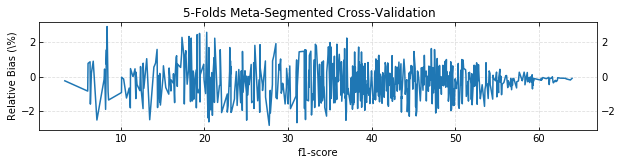

In [74]:
files = [
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Bag.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Hand.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Hips.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Torso.out',
    
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Bag-monteCarloIter2.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Hand-monteCarloIter2.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Hips-monteCarloIter2.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Torso-monteCarloIter2.out',
    
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Bag-monteCarloIter3.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Hand-monteCarloIter3.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Hips-monteCarloIter3.out',
    '../generated/5.5/pitfalls/pitfalls-5.5.3.5-Torso-monteCarloIter3.out',
]

pitfalls = np.concatenate(
    [np.genfromtxt(pitfall_file, dtype='str')
     for pitfall_file in files])

idx = np.arange(0, len(pitfalls), 4)
micro = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(1, len(pitfalls), 4)
avg = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(2, len(pitfalls), 4)
prre = [float(p.strip('%')) for p in pitfalls[idx]]

idx = np.arange(3, len(pitfalls), 4)
tpfp = [float(p.strip('%')) for p in pitfalls[idx]]

sort_idx = np.argsort(micro)
print(sort_idx)

micro = np.array([micro[i] for i in sort_idx])
avg = np.array([avg[i] for i in sort_idx])
prre = np.array([prre[i] for i in sort_idx])
tpfp = np.array([tpfp[i] for i in sort_idx])

micro_bias = (micro - avg) / avg * 100
prre_bias = (prre - avg) / avg * 100
tpfp_bias = (tpfp - avg) / avg * 100

fig = plt.figure(figsize=(10, 2))
plt.plot(micro, micro_bias)
# plt.plot(avg)
#plt.plot(prre, prre_bias)
# plt.plot(tpfp, tpfp_bias)

# customization
plt.grid()
plt.tick_params(top=True, direction='in')
plt.tick_params(labelright=True, direction='in')
plt.grid(which='major', linestyle='--', alpha=0.4)

fig.get_axes()[0].set_xlabel('f1-score')
fig.get_axes()[0].set_ylabel('Relative Bias (\%)')
fig.suptitle('5-Folds Meta-Segmented Cross-Validation')
fig.savefig("./pitfalls/relative-bias-5.5.3.5.svg", format="svg")

plt.show()